In [ ]:
import os

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [58]:
imgBGR= cv.imread("assets/photo.png")
assert imgBGR is not None, "Image not found. Please check the path."

In [59]:
imgBGR.shape  #(height, width, channels)=(rows,cols,3) for BGR

(1024, 1024, 3)

In [5]:
imgBGR.dtype

dtype('uint8')

In [7]:
cv.imshow("BGR Image", imgBGR)
cv.waitKey(0)
cv.destroyAllWindows()

In [63]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    #Display the frame in a window
    cv.imshow('Webcam Feed', frame)

    # Press 'q' to exit the loop

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows() #Close all OpenCV windows


In [62]:
import cv2 as cv

# Try MSMF (Win10+) then fallback to DirectShow
cap = cv.VideoCapture(0, cv.CAP_MSMF)
if not cap.isOpened():
    cap = cv.VideoCapture(0, cv.CAP_DSHOW)
    if not cap.isOpened():
        raise RuntimeError("Cannot open camera")

# Optional: pick a sane resolution
cap.set(cv.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 480)

# Optional warm-up
for _ in range(5):
    cap.read()

while True:
    ret, frame = cap.read()
    if not ret or frame is None:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    cv.imshow('Webcam Feed', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


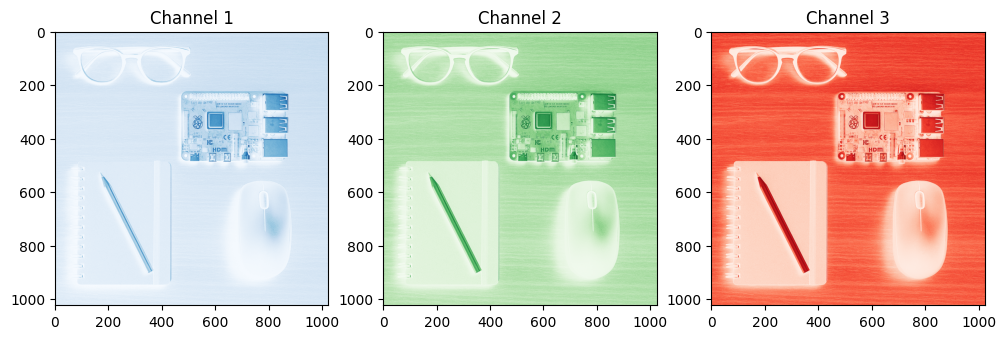

In [17]:
#visualise
channel_1, channel_2, channel_3 = cv.split(imgBGR)
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)  #no. of rows, no. of columns, index of subplot
plt.imshow(channel_1, cmap='Blues')  #using 'Blues' colormap for better visibility
plt.title('Channel 1')
plt.subplot(1,3,2) 
plt.imshow(channel_2, cmap='Greens')
plt.title('Channel 2')
plt.subplot(1,3,3) 
plt.imshow(channel_3, cmap='Reds')
plt.title('Channel 3')
plt.show()

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

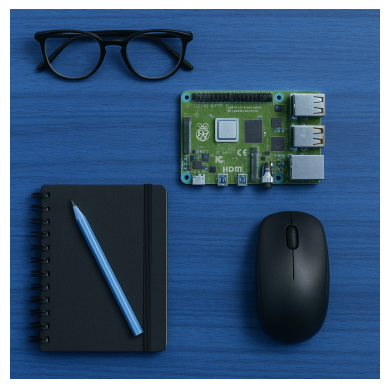

In [20]:
plt.imshow(imgBGR)
plt.axis('off')  # Hide the axes

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

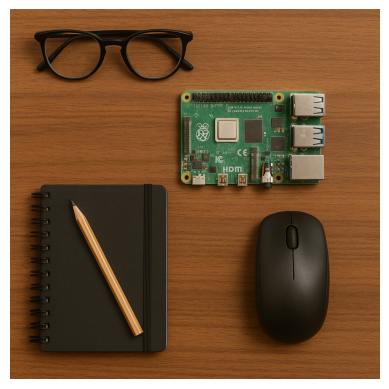

In [24]:
imgRGB=cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display in matplotlib
plt.imshow(imgBGR)
plt.axis('off')

In [25]:
assert imgRGB.shape == imgBGR.shape,  "Shape mismatch after conversion"

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

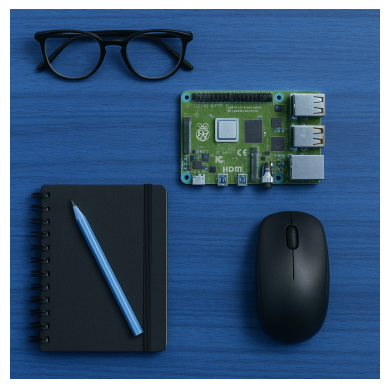

In [23]:
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.axis('off')

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

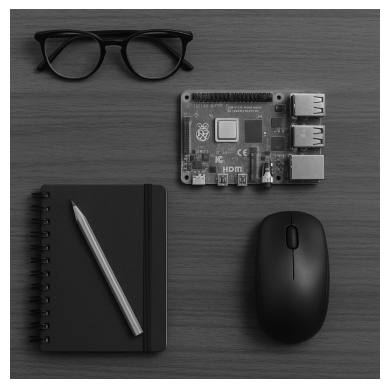

In [32]:
imgGrey =cv.cvtColor(imgBGR, cv.COLOR_BGR2GRAY)  # Convert BGR to Grayscale
plt.imshow(imgGrey, cmap='gray')
plt.axis('off')

In [36]:
imgHSV = cv.cvtColor(imgBGR, cv.COLOR_BGR2HSV)  # Convert BGR to HSV

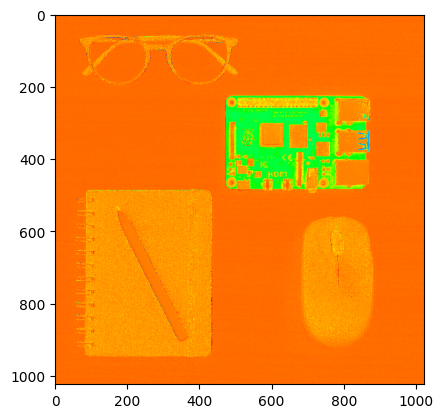

In [53]:
#Hue Channel
hue_channel = imgHSV[:, :, 0]
plt.imshow(hue_channel, cmap='hsv')

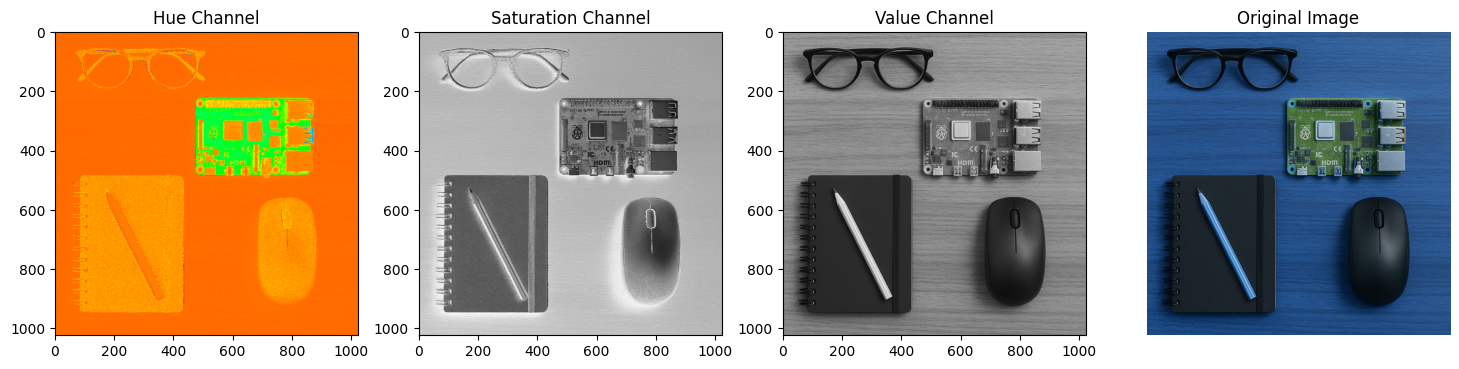

In [38]:
imgHue = imgHSV [:, :, 0]  # Extract the Hue channel
imgSaturation = imgHSV[:, :, 1]  # Extract the Saturation channel
imgValue = imgHSV[:, :, 2]  # Extract the Value channel

plt.figure(figsize=(18, 4))
plt.subplot(1,4,1)
plt.imshow(imgHue, cmap='hsv')
plt.title('Hue Channel')
plt.subplot(1,4,2)
plt.imshow(imgSaturation, cmap='gray')
plt.title('Saturation Channel')
plt.subplot(1,4,3)
plt.imshow(imgValue, cmap='gray')
plt.title('Value Channel')
plt.subplot(1,4,4)
plt.imshow(imgBGR)
plt.title('Original Image')
plt.axis('off')
plt.show()

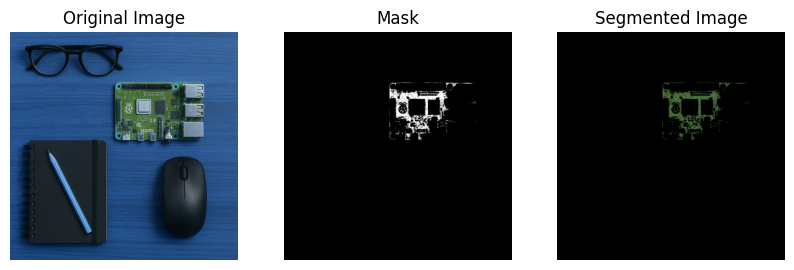

In [ ]:
#Segment the Raspberry pi 
lower_bound = np.array([35, 100, 100])  # Lower bound for HSV values
upper_bound = np.array([85, 255, 255])  # Upper bound for HSV values

mask = cv.inRange(imgHSV, lower_bound, upper_bound)  # Create a mask for the specified HSV range

segmented_image = cv.bitwise_and(imgRGB, imgRGB, mask=mask)  # Apply the mask to the original image
#plt.imshow(mask, cmap='gray')
#plt.axis('off')  # Hide the axes

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imgRGB)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')
plt.show()


#Red  

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

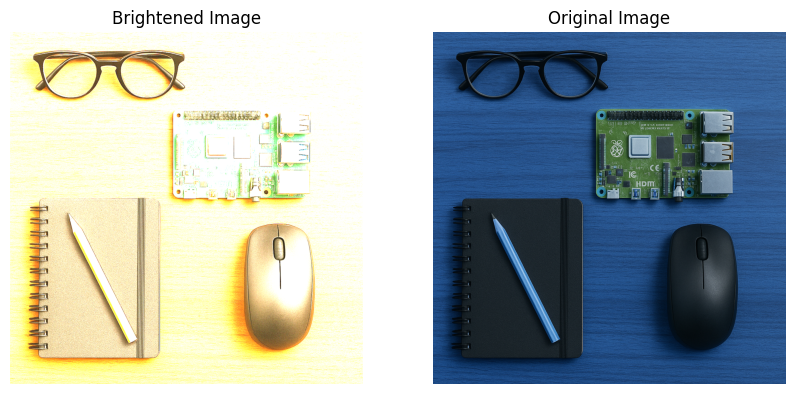

In [56]:
alpha = 5.9  # No scaling
beta = 20 # Brightness adjustment
bright_contrast = cv.convertScaleAbs(imgBGR, alpha=alpha, beta=beta)  # Adjust brightness and contrast
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(bright_contrast, cv.COLOR_BGR2RGB))
plt.title('Brightened Image')
plt.axis('off')  # Hide the axes
plt.subplot(1, 2, 2)
plt.imshow(imgRGB)
plt.title('Original Image')
plt.axis('off')

In [ ]:
# Save the image in RGB format
output_path = "assets/brightened_image.png"
cv.imwrite("assets/bright_contrast", cv.bright_contrast))

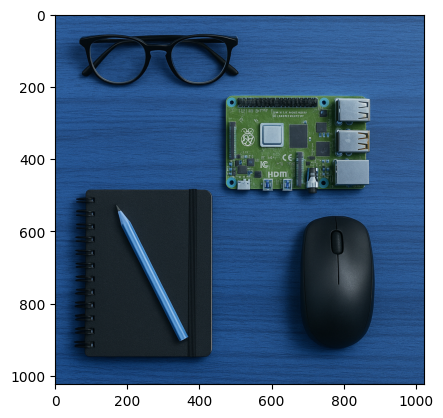

In [52]:
plt.imshow(imgRGB)